# Vamos a ver como visualizar datos con matplotlib

In [23]:
import matplotlib.pyplot as plt #Hemos instalado matplotlib con !pip install matplotlib
import numpy as np
import pandas as pd
import warnings
from pathlib import Path
datapath = Path('../Estructura_de_Datos/house.csv')
warnings.filterwarnings('ignore')

In [24]:
data = pd.read_csv(datapath)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [25]:
#Hemos creado un subconjunto de datos en el que las fechas no se repiten
#y son el índice de las filas
sb = data.drop_duplicates(subset=['date'], keep='first')
sb.set_index('date', inplace=True)
sb.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-03 00:00:00,625000.0,4.0,2.75,2920,6605,2.0,0,0,3,2920,0,2012,1912,5608 NE 5th Cir,Renton,WA 98059,USA
2014-05-04 00:00:00,775000.0,2.0,2.50,2680,7392,1.0,0,0,3,2680,0,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA
2014-05-05 00:00:00,560000.0,3.0,2.50,1900,8744,2.0,0,0,3,1900,0,1987,2000,22314 NE 11th Pl,Sammamish,WA 98074,USA
2014-05-06 00:00:00,397000.0,4.0,2.00,1440,7680,1.0,0,0,3,1200,240,1971,0,10601 NE 138th Pl,Kirkland,WA 98034,USA


<Axes: xlabel='floors'>

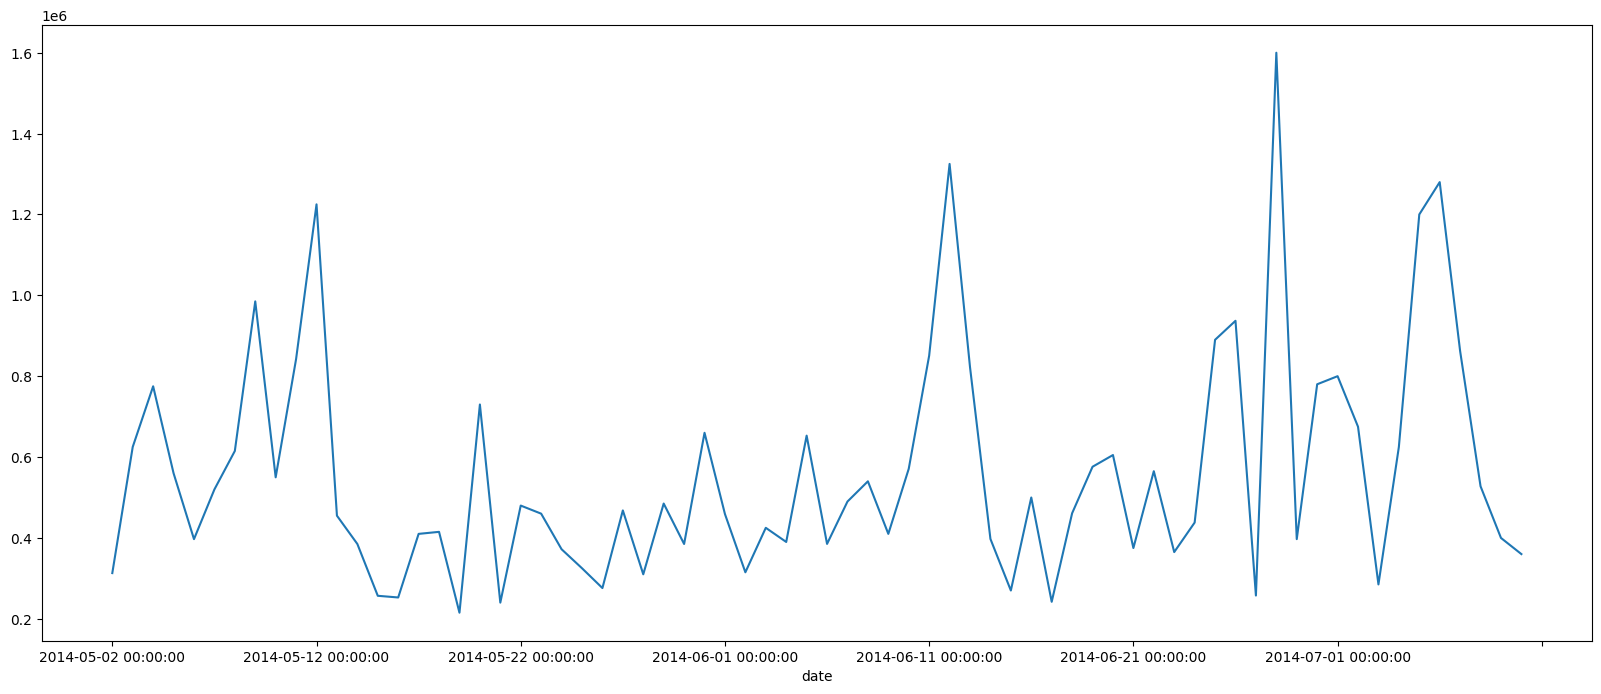

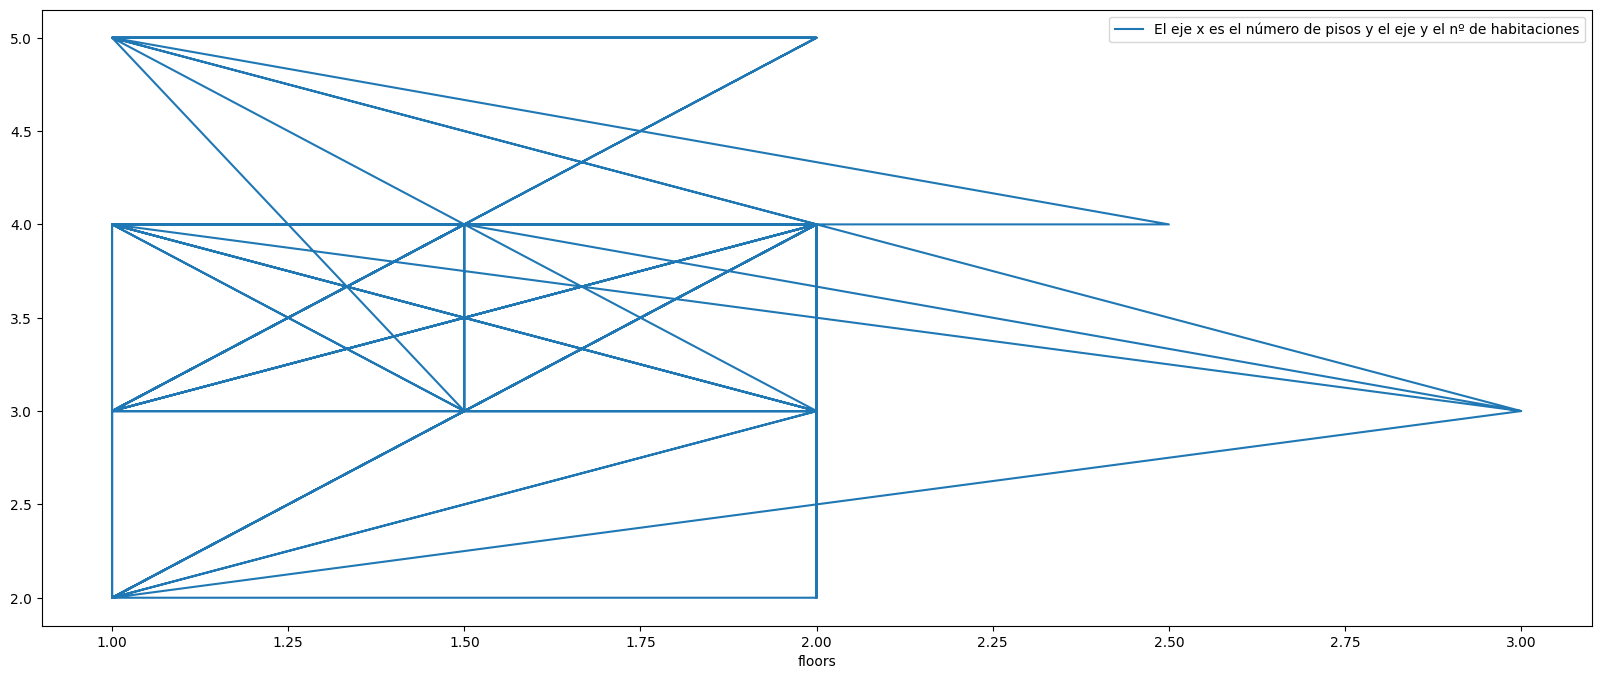

In [26]:
#Para implementar un gráfico de líneas con matplotlib:
sb['price'].plot(figsize=(20, 8))
#También podriamos definir los ejes x e y y hacer un gráfico de lineas a partir de ellos:
sb.plot(x='floors', y='bedrooms', figsize=(20, 8), label='El eje x es el número de pisos y el eje y el nº de habitaciones')

<Axes: xlabel='date'>

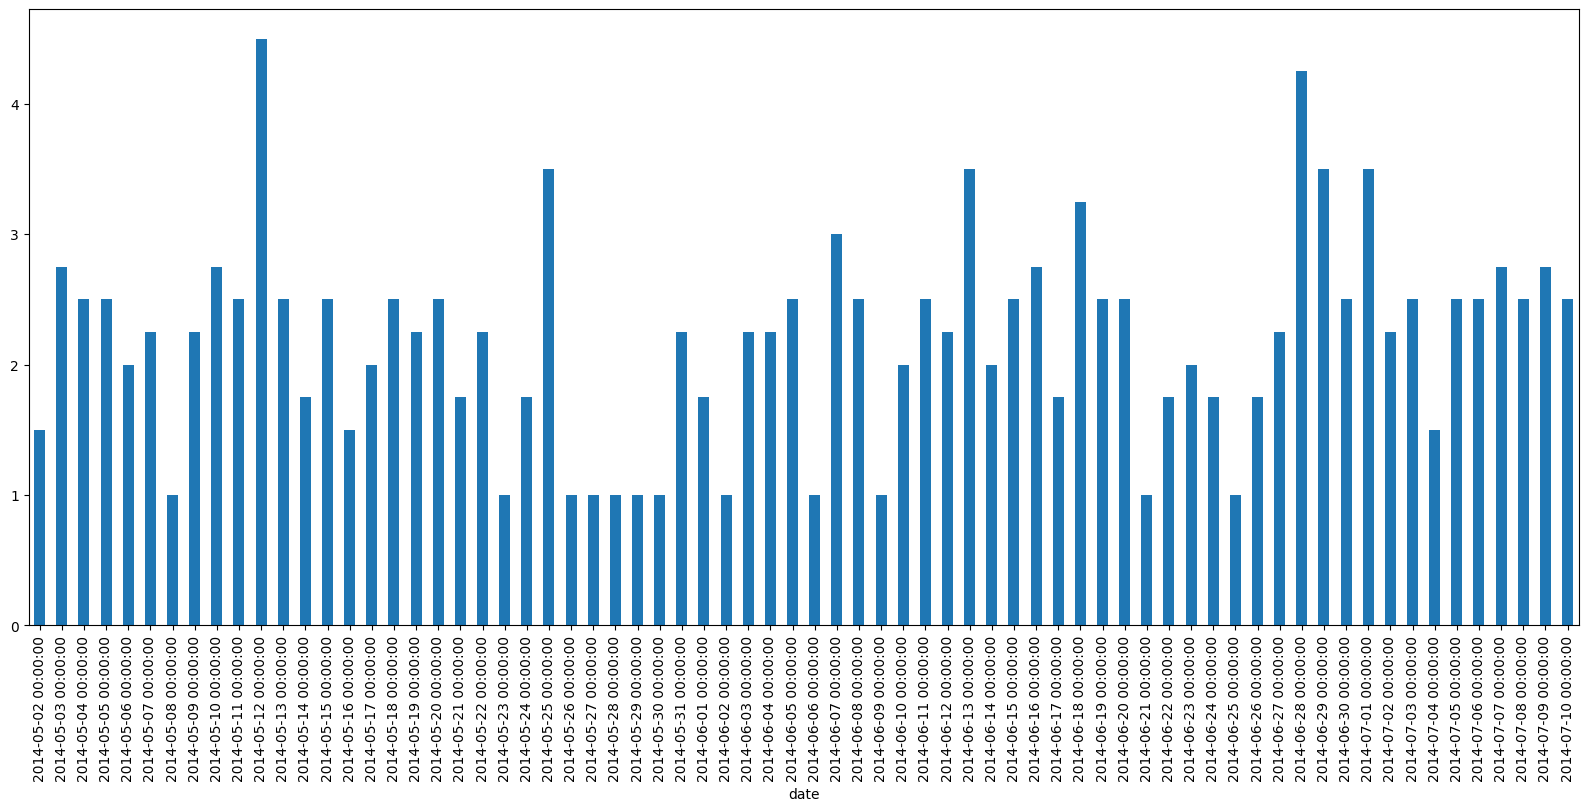

In [27]:
# Para hacer un gráfico de barras con matplotlib:
sb['bathrooms'].plot(kind = 'bar', figsize=(20, 8))

<Axes: xlabel='date'>

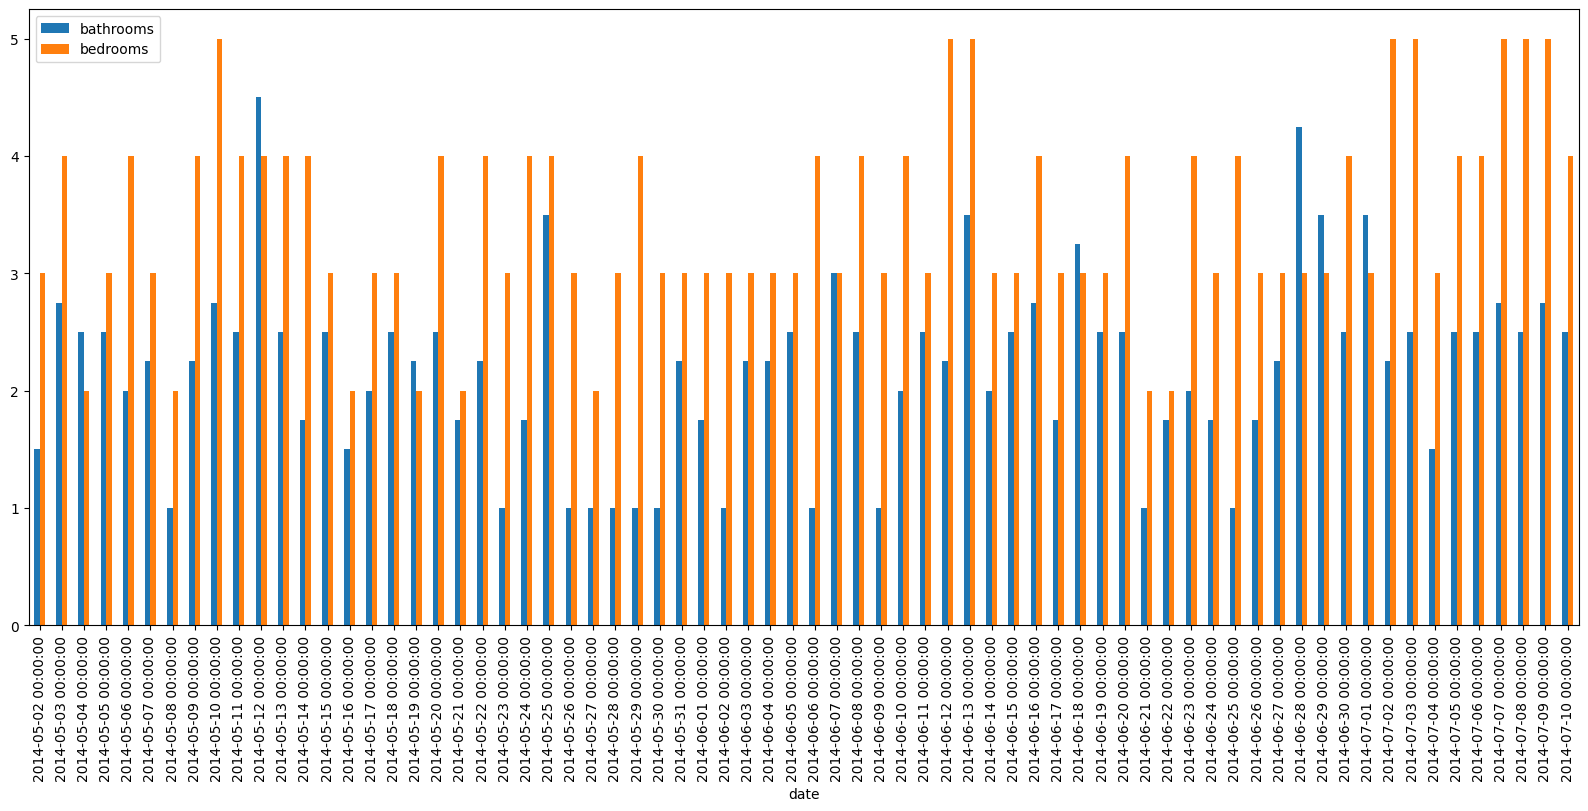

In [28]:
#Si quisieramos pintar dos variables en un mismo gráfico:
sb[['bathrooms', 'bedrooms']].plot(kind = 'bar', figsize=(20, 8))

In [33]:
#Grafico de dispersión
#Para que el precio tenga sentido vamos a hacerlo en escala logarítmica en base a 10 y así se verá mejor
# dado que hay precios muy altos y normalizar la variable precio nos ayudará a ver mejor la dispersión
sb['price'] = np.log(sb['price'])

<Axes: xlabel='condition', ylabel='price'>

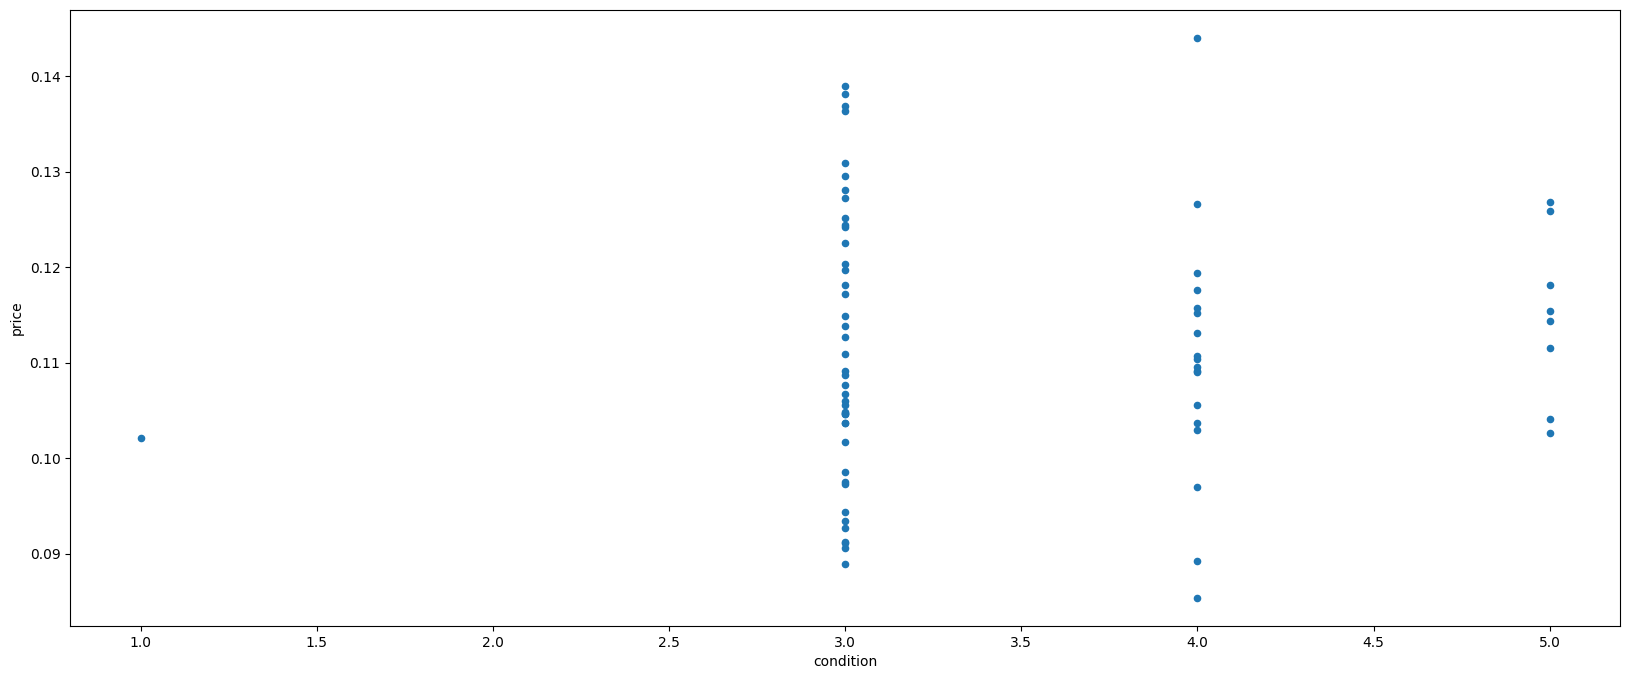

In [34]:
sb.plot(kind='scatter', x='condition', y='price', figsize=(20, 8))

<Axes: >

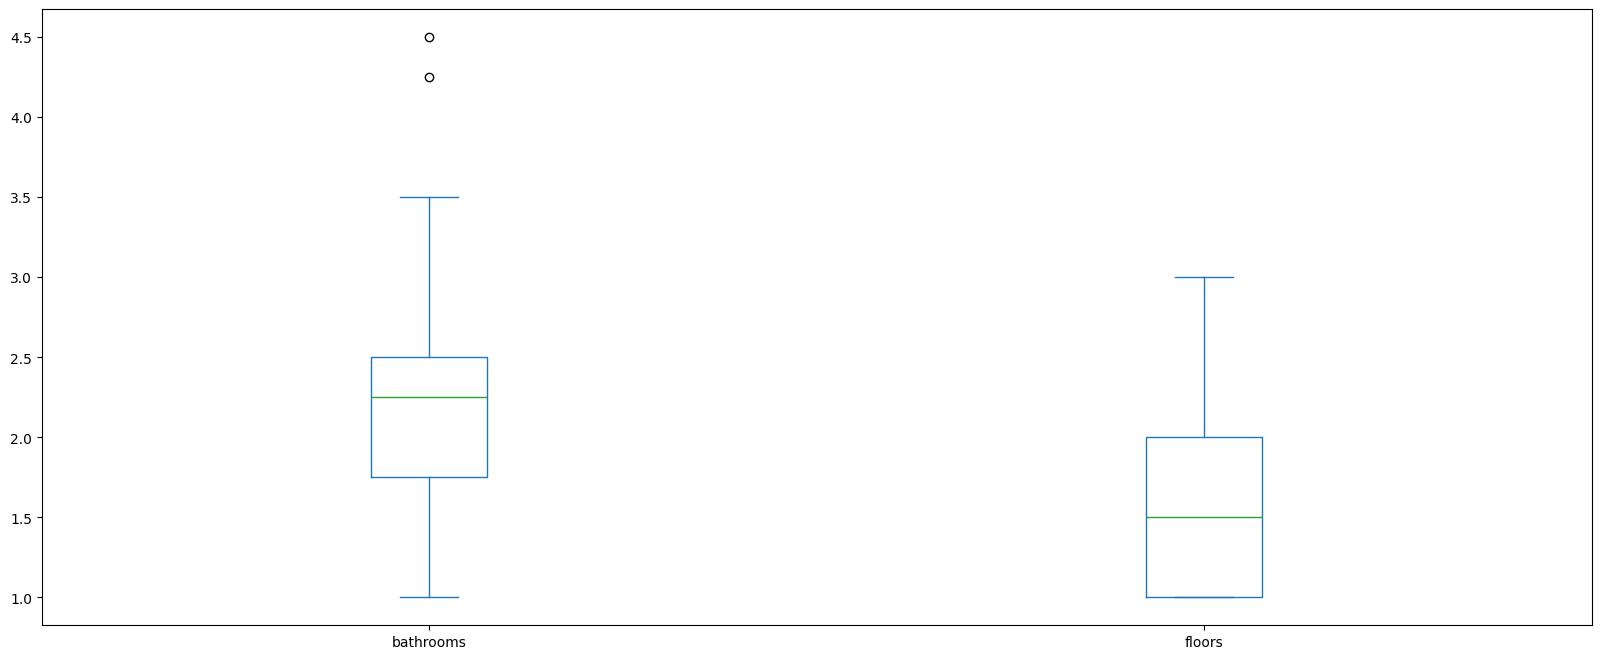

In [ ]:
#Gráfico de cajas:
sb[['bathrooms', 'floors']].plot(kind='box', figsize=(20, 8))
#Con el gráfico de cajas podemos ver la mediana, los cuartiles, los valores atípicos y la dispersión de los datos. Por lo que
# es muy útil para analisis exploratorio de datos en los que ver los outliers. Es decir podemos ver la distribución de los datos
# y ver si hay valores atípicos

<Axes: ylabel='count'>

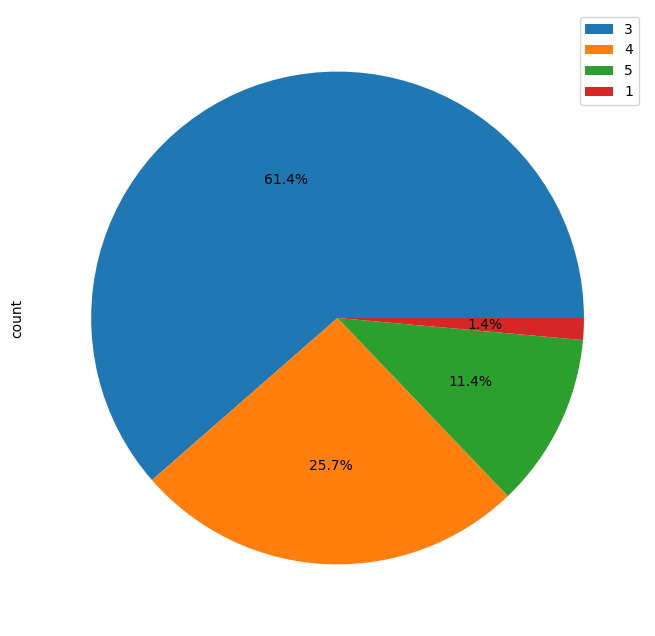

In [45]:
#Gráfico de tarta:
sb['condition'].value_counts().plot(kind='pie', figsize=(10, 8), legend=True, labels=None, autopct='%1.1f%%')